## IMPORT ALL THE LIBRARIES REQUIRED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## READ THE DATASET

In [2]:
df = pd.read_csv("spam_ham_dataset.csv")

## EXPLORE THE DATASET

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,5171.0,2585.000000,1492.883452,0.0,1292.5,2585.0,3877.5,5170.0
label_num,5171.0,0.289886,0.453753,0.0,0.0,0.0,1.0,1.0


In [5]:
df['label'].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

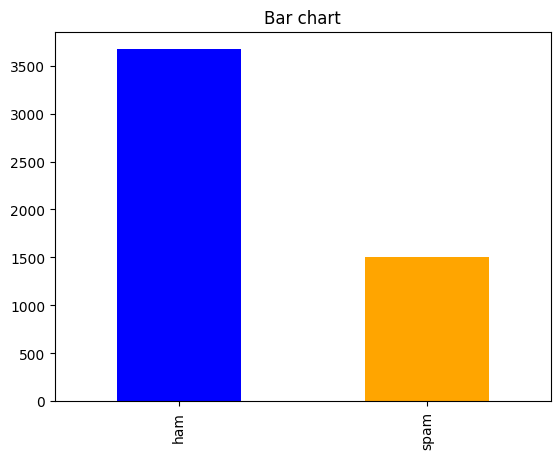

In [6]:
count_spam=pd.value_counts(df['label'], sort= True)
count_spam.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [7]:
X,y = df.text, df.label

## SPLIT THE DATASET

In [8]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size=0.2)

## DATAPREPROCESSING USING CountVectorizer()

## CountVectorizer() is used to clean data 

In [9]:
vectorizer = CountVectorizer() #stop_words = 'english'

In [10]:
count = vectorizer.fit_transform(X_train.values)

In [11]:
frequency_matrix = vectorizer.transform(X_train.values).toarray()
frequency_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 5, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
labels = y_train.values

## BUILD A MODEL

In [13]:
model =  MultinomialNB()
model.fit(count, labels)

MultinomialNB()

In [14]:
y_pred = model.predict(vectorizer.transform(X_test))

## EVALUATE THE MODEL

In [15]:
print(accuracy_score(y_test, y_pred))

0.978743961352657


In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.98      0.99      0.99       746
        spam       0.97      0.96      0.96       289

    accuracy                           0.98      1035
   macro avg       0.98      0.97      0.97      1035
weighted avg       0.98      0.98      0.98      1035



[[737   9]
 [ 13 276]]


<AxesSubplot:>

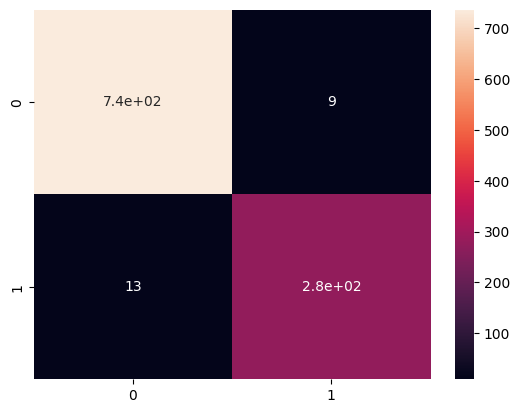

In [17]:
import seaborn as sns
print(confusion_matrix(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True)